## Dynamic Decoupling
Dynamic Decoupling could be made very specific for the hardware, but it assumes we know the interactions of the circuit with the environment. We can optimize the circuit by learnign the parameters from the circuit, calcuting the cost function.

Dynamical decoupling works by adding pulse sequences (known as dynamical decoupling sequences) to idle qubits to flip them around the Bloch sphere, which cancels the effect of noise channels, thereby suppressing decoherence. 

### Step 1
Build the circuit, lets do the Bell basis


In [1]:
# Import necessary modules for this notebook
import qiskit
import time
import math
import numpy as np
from math import *

#design
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *
from qiskit.circuit.library import *

from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import *
from qiskit.transpiler.passes import *
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import *
print(qiskit.__version__)

1.4.2


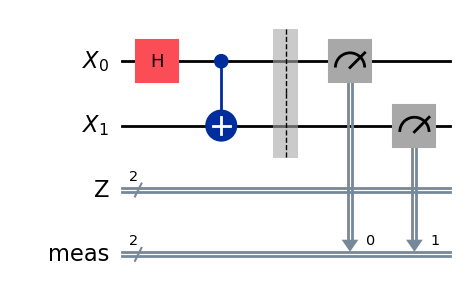

In [2]:
m = 2
n = 0
control = QuantumRegister(m, "X")
target = QuantumRegister(n, "Y")
output = ClassicalRegister(m, "Z")

qc = QuantumCircuit(control, target, output)
qc.h(0)
qc.cx(0,1)
#qc.cx(0,2)
#qc.cx(0, 3)
qc.measure_all()
display(qc.draw(output = "mpl"))


### Step 2 
Transpile the circuit,
1. Use build in Generate pass manager + Qiskit's DD 
2. Build a custom pass using the Learning Dynamic Decoupling 

In [ ]:
class dynamic_decoupling(TransformationPass)

In [3]:
basis_gates = []
transpile = PassManager(
    ConsolidateBlocks(basis_gates= basis_gates),
    UnitarySynthesis(basis_gates)
)

In [4]:
basis_gates = ["rx", "ry", "rxx"]
init = PassManager(
    [UnitarySynthesis(basis_gates, min_qubits=3), Unroll3qOrMore()]
)
staged_pm = StagedPassManager(
    stages=["init", "translation"], init=init, translation=translate
)

NameError: name 'translate' is not defined

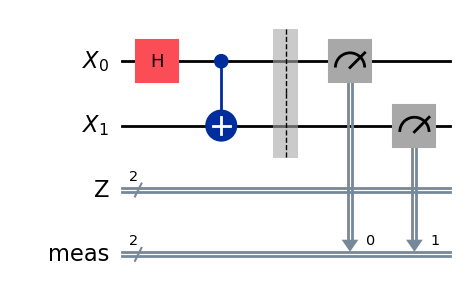

In [5]:
transpiled_circuit = transpile.run(qc)
transpiled_circuit.draw(output= "mpl")

In [ ]:
def single_rotations(theta, phi, lambda, N):
    return UGate(theta = theta, phi = phi, lam= = lambda)

### Step 3 
Execute the circuit, 
1. try Qiskit's Dynamic Decoupling sequences in this step : PadDynamicDecoupling. dynamical decoupling pulses need to be added after the circuit has been transpiled and scheduled.
2. Using our pass manager, execute using Qiskit's primitives 

In [ ]:
dd_pm = PassManager(
    [
        ALAPScheduleAnalysis(target=target),
        PadDynamicalDecoupling(target=target, dd_sequence=dd_sequence),
    ]
)

### Step 4 
Post processing the circuit, compare with CPMG and XYXY